<h1><strong><center>Meteostat</center></strong></h1>



In [1]:
#installation de meteostat
!pip install meteostat
!pip install chart_studio
!pip install --upgrade plotly
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 4.5 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 96.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 47.9 MB/s eta 0:00:00


In [2]:
#Import de librairies
from meteostat import Point, Daily
from datetime import datetime, date
import matplotlib.pyplot as plt
from chart_studio import plotly
import cufflinks as cf
from plotly.offline import iplot

#longitude, latitude
#Coordonnées du site Puy-du-Fou Espagne
puy_du_fou = Point(39.8581,-4.0226)

start = datetime(2018, 1, 1)
end = datetime(2022, 3, 28)

#collecte des donnees meteo d'un periode donnee
data = Daily(puy_du_fou, start, end)
data = data.fetch()

In [3]:
#Temperature maximale de la journee, précipitations quotidiennes en mm, ensoleillement quotidien en minutes (m)
weather = data[['tmax', 'prcp']]

In [4]:
import pandas as pd
import numpy as np
#copie des index (dates) en tant que colonne du dataframe
weather["Date"] =np.array(weather.index)
weather["Date"] = np.array(weather.Date)

In [5]:
#creation d'une colonne dans le dataframe contenant le jour de la semaine en format "chiffre": lundi = 0, mardi = 1, mercredi = 2 ... 
weekda = []
for i in range(len(weather)):
  weekda.append(weather["Date"][i].weekday())

weather["weekday"]= weekda

In [ ]:
#day = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']

In [6]:
weather["Day"] = weather["Date"].dt.day_name()
weather.pop("weekday")

time
2018-01-01    0
2018-01-02    1
2018-01-03    2
2018-01-04    3
2018-01-05    4
             ..
2022-03-24    3
2022-03-25    4
2022-03-26    5
2022-03-27    6
2022-03-28    0
Freq: D, Name: weekday, Length: 1548, dtype: int64

In [7]:
weather

,tmax,prcp,Date,Day
time,,,,
2018-01-01,12.5,0.0,2018-01-01,Monday
2018-01-02,14.8,0.0,2018-01-02,Tuesday
2018-01-03,14.1,0.0,2018-01-03,Wednesday
2018-01-04,16.0,0.0,2018-01-04,Thursday
2018-01-05,14.2,11.6,2018-01-05,Friday
...,...,...,...,...
2022-03-24,13.4,1.2,2022-03-24,Thursday
2022-03-25,13.7,0.4,2022-03-25,Friday
2022-03-26,14.2,0.0,2022-03-26,Saturday


In [ ]:
#Chargement des données dans un fichier csv
# weather.to_csv("meteo.csv", index = False)

In [8]:
#chargement du nouveau csv
#saison = avril à octobre
#les jours d'ouverture du site varient en fonction des années
df_meteo_visitors = weather
df_meteo_visitors['nbr_visitors'] = np.random.randint(2000,10000, df_meteo_visitors.shape[0])

In [9]:
data = weather
data_temp = data['tmax']
data_temp

time
2018-01-01    12.5
2018-01-02    14.8
2018-01-03    14.1
2018-01-04    16.0
2018-01-05    14.2
              ... 
2022-03-24    13.4
2022-03-25    13.7
2022-03-26    14.2
2022-03-27    15.4
2022-03-28    19.3
Freq: D, Name: tmax, Length: 1548, dtype: float64

In [10]:
#Chargement des données dans un fichier csv
data_puy = df_meteo_visitors.to_csv("meteo.csv", index = False)


In [11]:
data.head()

,tmax,prcp,Date,Day,nbr_visitors
time,,,,,
2018-01-01,12.5,0.0,2018-01-01,Monday,8456
2018-01-02,14.8,0.0,2018-01-02,Tuesday,7285
2018-01-03,14.1,0.0,2018-01-03,Wednesday,6813
2018-01-04,16.0,0.0,2018-01-04,Thursday,9166
2018-01-05,14.2,11.6,2018-01-05,Friday,9491


**Predictive Analytics**

In [12]:
data.columns

Index(['tmax', 'prcp', 'Date', 'Day', 'nbr_visitors'], dtype='object')

In [ ]:
!pip install plotly==3.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.5/41.5 MB 21.4 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.14.1
    Uninstalling plotly-5.14.1:
      Successfully uninstalled plotly-5.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cufflinks 0.17.3 requires plotly>=4.1.1, but you have plotly 3.10.0 which is incompatible.


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as smt

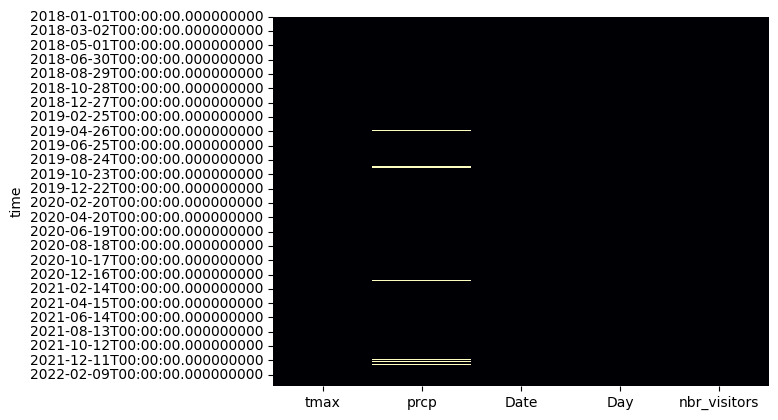

In [14]:
sns.heatmap(data.isnull(),cmap = 'magma',cbar = False);

In [15]:
data.describe()

,tmax,prcp,nbr_visitors
count,1548.000000,1527.000000,1548.000000
mean,22.633269,0.946234,5971.847545
std,9.125506,3.439347,2300.933243
min,0.900000,0.000000,2005.000000
25%,15.075000,0.000000,3962.500000
50%,20.800000,0.000000,5946.500000
75%,30.225000,0.000000,7980.250000
max,44.200000,56.600000,9999.000000


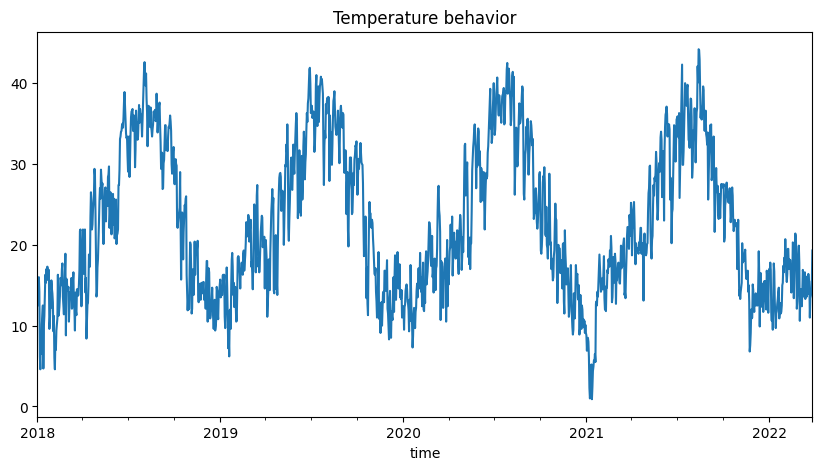

In [16]:
plt.figure(figsize = (10,5))
data_temp.plot();

plt.title("Temperature behavior")
plt.show()

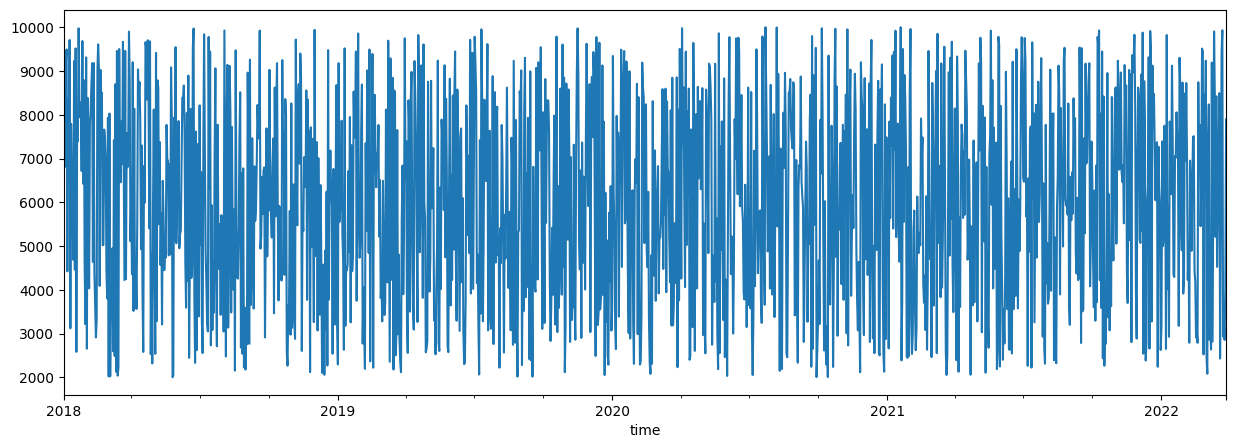

In [17]:
plt.figure(figsize = (15,5))
data['nbr_visitors'].plot();

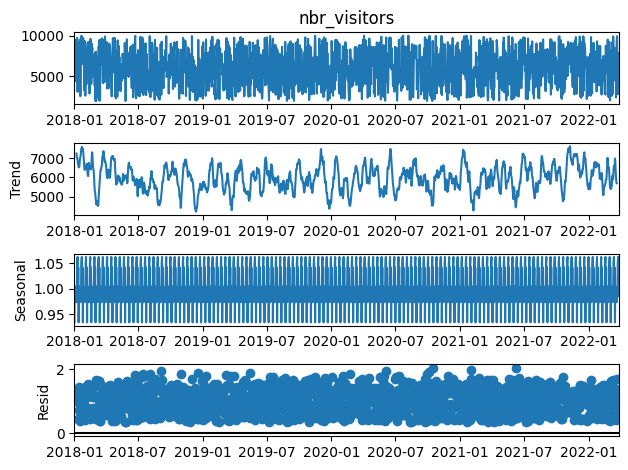

In [19]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
# from plotly.plotly import plot_mpl
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(data['nbr_visitors'], period=12 ,model='multiplicative')

fig = result.plot()
# plot_mpl(fig)
fig.show()

In [20]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data['nbr_visitors'], start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=12.07 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=30214.600, Time=0.10 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=29380.656, Time=1.55 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=4.48 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=29738.480, Time=0.16 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=29239.459, Time=2.41 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=16.74 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=4.27 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=29589.381, Time=1.34 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=29036.322, Time=4.44 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=29146.694, Time=8.26 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=22.97 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=6.55 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=28839.025, Time=19.82 sec
 ARIMA(3,1,0)(1,1,0)[12]             

In [ ]:
data

,tmax,prcp,Date,Day,nbr_visitors
time,,,,,
2018-01-01,12.5,0.0,2018-01-01,Monday,4860
2018-01-02,14.8,0.0,2018-01-02,Tuesday,2057
2018-01-03,14.1,0.0,2018-01-03,Wednesday,2128
2018-01-04,16.0,0.0,2018-01-04,Thursday,5355
2018-01-05,14.2,11.6,2018-01-05,Friday,4871
...,...,...,...,...,...
2022-03-24,13.4,1.2,2022-03-24,Thursday,2169
2022-03-25,13.7,0.4,2022-03-25,Friday,4396
2022-03-26,14.2,0.0,2022-03-26,Saturday,6066


In [27]:
train = data.loc['2018-01-01':'2022-02-28']
test = data.loc['2022-03-08':]

In [24]:
# train['nbr_visitors']

time
2018-01-01    8456
2018-01-02    7285
2018-01-03    6813
2018-01-04    9166
2018-01-05    9491
              ... 
2022-02-24    9511
2022-02-25    9455
2022-02-26    2526
2022-02-27    8458
2022-02-28    7391
Freq: D, Name: nbr_visitors, Length: 1520, dtype: int64

In [28]:
stepwise_model.fit(train['nbr_visitors'])

ARIMA(order=(3, 1, 0), scoring_args={}, seasonal_order=(2, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [31]:
future_forecast = stepwise_model.predict(n_periods=37)
# This returns an array of predictions:
future_forecast

2022-03-01    3660.496723
2022-03-02    5844.681874
2022-03-03    8005.522917
2022-03-04    7101.240634
2022-03-05    6829.493875
2022-03-06    7067.452621
2022-03-07    6244.189157
2022-03-08    7689.483185
2022-03-09    9165.691294
2022-03-10    5287.442078
2022-03-11    7978.038615
2022-03-12    6621.785989
2022-03-13    4322.824163
2022-03-14    5317.592638
2022-03-15    6992.374287
2022-03-16    7562.044876
2022-03-17    7541.068030
2022-03-18    6466.717638
2022-03-19    7005.534498
2022-03-20    8775.297695
2022-03-21    9293.912638
2022-03-22    4827.067738
2022-03-23    7399.395637
2022-03-24    6153.435978
2022-03-25    4317.295276
2022-03-26    5202.616926
2022-03-27    8542.390840
2022-03-28    7751.439820
2022-03-29    8055.218817
2022-03-30    6913.395036
2022-03-31    7220.508525
2022-04-01    9363.274164
2022-04-02    9950.665334
2022-04-03    4773.491010
2022-04-04    8578.570043
2022-04-05    7364.934702
2022-04-06    4720.424435
Freq: D, dtype: float64

In [ ]:
future_forecast = pd.DataFrame(future_forecast,index = test.index,columns=['Prediction'])
concatenated_df = pd.concat([test['nbr_visitors'],future_forecast],axis=1)